<a href="https://colab.research.google.com/github/aipalak/CV-DL/blob/main/ANN_teras_make_blobs(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from sklearn.datasets import make_blobs
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

In [101]:
data,target=make_blobs(n_samples=1000,centers=2)

In [102]:
data.shape

(1000, 2)

In [103]:
data[:5]

array([[-8.09988587, -1.88108487],
       [-8.87667906, -7.83777332],
       [-7.55111951, -3.20223333],
       [-7.03168716, -2.75366353],
       [-5.96770838, -3.23209197]])

In [104]:
target[:5]

array([0, 1, 0, 0, 0])

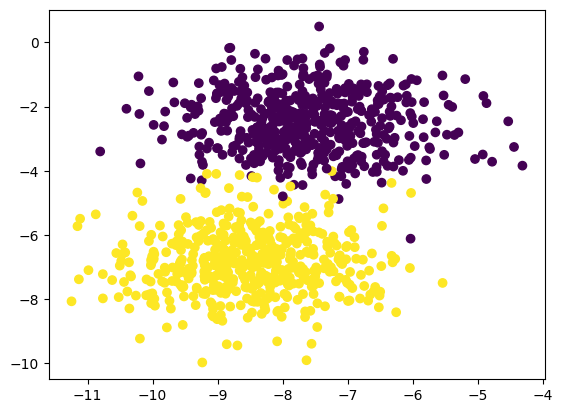

In [105]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

In [106]:
model=Sequential([
    Input(shape=[2]),
    Dense(4,activation="relu"),
    Dense(4,activation="relu"),
    Dense(1,activation="sigmoid")
])

In [107]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 4)                 12        
                                                                 
 dense_31 (Dense)            (None, 4)                 20        
                                                                 
 dense_32 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [108]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25)

In [109]:
x_train.shape

(750, 2)

In [110]:
x_test.shape

(250, 2)

In [112]:
losses=tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=losses,metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
24/24 [==============================] - 3s 53ms/step - loss: 0.7458 - accuracy: 0.5040 - val_loss: 0.7376 - val_accuracy: 0.4880
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7183 - accuracy: 0.5040 - val_loss: 0.7142 - val_accuracy: 0.4880
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 0.7018 - accuracy: 0.5027 - val_loss: 0.7015 - val_accuracy: 0.4800
Epoch 4/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5013 - val_loss: 0.6920 - val_accuracy: 0.4880
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.6844 - accuracy: 0.5107 - val_loss: 0.6843 - val_accuracy: 0.5240
Epoch 6/50
24/24 [==============================] - 0s 7ms/step - loss: 0.6775 - accuracy: 0.5480 - val_loss: 0.6774 - val_accuracy: 0.5760
Epoch 7/50
24/24 [==============================] - 0s 6ms/step - loss: 0.6707 - accuracy: 0.6027 - val_loss: 0.6701 - val_accuracy: 0.6240
Epoch 8/50
24/24 [=

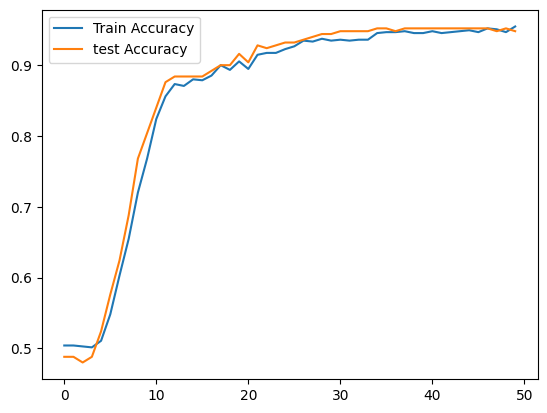

In [113]:
plt.plot(history.history['accuracy'],label="Train Accuracy")
plt.plot(history.history['val_accuracy'],label="test Accuracy")
plt.legend()
plt.show()

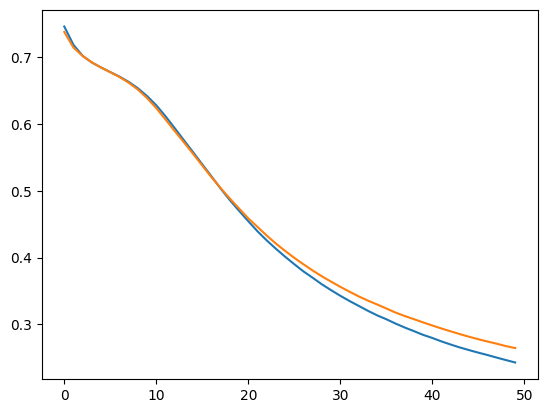

In [114]:
plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'],label="Test Loss")
plt.show()

In [115]:
y_pred=model.predict(x_test)

8/8 [==============================] - 0s 2ms/step


In [116]:
y_pred=np.round(y_pred)

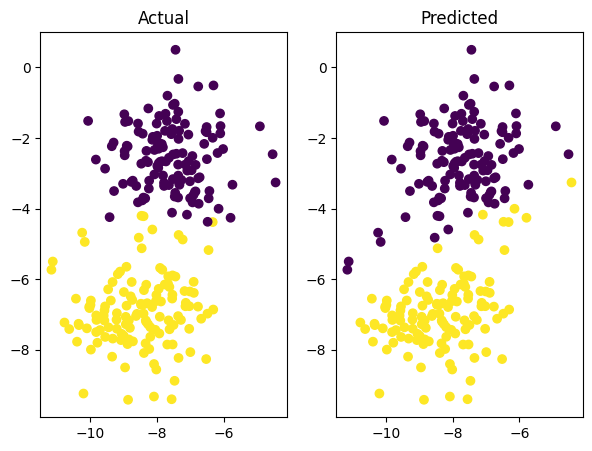

In [120]:
plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.title("Actual")
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.subplot(1,2,2)
plt.title("Predicted")
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.show()